# Pattern Generator

In [1]:
INT16_FAC = (2**15)-1
INT32_FAC = (2**31)-1
INT64_FAC = (2**63)-1
norm_fact = {'int16':INT16_FAC, 'int32':INT32_FAC, 'int64':INT64_FAC,'float32':1.0,'float64':1.0}

import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import scipy.signal as signal
import librosa
from scipy.fftpack import fft, ifft

 ### Pulse Generator

[      0   66150  132300  220500  264600  352800  418950  485100  573300
  617400  705600  771750  837900  926100  970200 1058400 1124550 1190700
 1278900 1323000]


Text(0, 0.5, 'Amplitude')

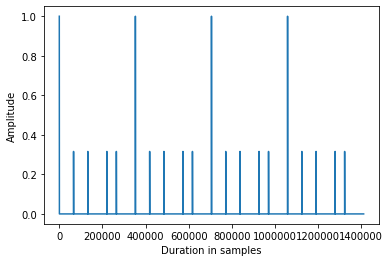

In [3]:
fs = 44100
bpm= 120
timsig = 16
bar = 4
s = np.array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0 ,0])
while True:
        if (60*fs%bpm != 0):
            fs+=1
        else:
            break

samplehop= int((60/bpm)*fs)
x = np.zeros(int(fs*((60/bpm)*bar*timsig)))
barc=0
countsig=timsig
si=0
for counter in range(len(x)):
        if (counter%samplehop==0):
             imp = signal.unit_impulse((int(fs*((60/bpm)*bar*timsig))), [counter])
             if (s[si]==1):
                if(countsig==timsig):
                    x = x+imp
                
                else:
                    x = x+ (0.316*imp)
             elif (s[si]==0):
                  x = x
            
                 
            
                
             counter+=1
             countsig-=1
             si+=1
             if(countsig==0):
                countsig = timsig
                barc+=1
                si=0
                if(barc==bar):
                    break
onset_gen = np.where(x>0) 
onset_gen = onset_gen[0]
print(onset_gen)
plt.plot(x)
plt.xlabel("Duration in samples")
plt.ylabel("Amplitude")



### Convolution Function

Text(0, 0.5, 'Amplitude')

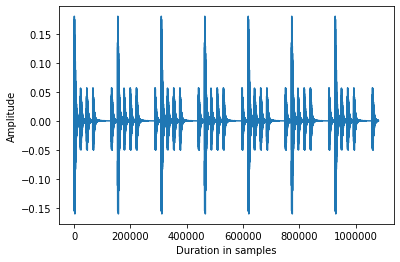

In [3]:
y, s = librosa.load('/Users/noelalben/Downloads/judd-madden-drum-samples/Hi Hat/Hi Hat 8.wav', sr=fs)
y = np.float32(y)/norm_fact[y.dtype.name]
zeros = np.zeros(x.size-y.size)
y = np.append(y,zeros)
Y = fft(y)
X = fft(x)

kick1 = np.real(ifft(X*Y))
plt.plot(kick1)
plt.xlabel("Duration in samples")
plt.ylabel("Amplitude")